In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))



# Any results you write to the current directory are saved as output.

reddit_worldnews_start_to_2016-11-22.csv



Credit to [Aleksey Bilogur](https://www.kaggle.com/residentmario/kernels) notebooks for inspiration

Lets start by importing the data and having a glimpse of the dataset

In [2]:
data= pd.read_csv("../input/reddit_worldnews_start_to_2016-11-22.csv")

In [3]:
data.shape


(509236, 8)

Columns in the dataset

In [4]:
data.columns

Index(['time_created', 'date_created', 'up_votes', 'down_votes', 'title',
       'over_18', 'author', 'subreddit'],
      dtype='object')

The columns and data type

In [5]:
data.dtypes

time_created     int64
date_created    object
up_votes         int64
down_votes       int64
title           object
over_18           bool
author          object
subreddit       object
dtype: object

A glimpse of the dataset rows and columns

In [6]:
data.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


Analysis starts here

Posts with the most upvotes

In [8]:
data['up_votes'].sort_values(ascending=False).value_counts().head()

0    93555
1    46619
2    44195
3    36112
4    29917
Name: up_votes, dtype: int64

In [9]:
data['down_votes'].sort_values(ascending=False).value_counts().head()

0    509236
Name: down_votes, dtype: int64

we can see from above that they are no posts with downvotes

Let us check for most upoted headline

In [10]:
[title for title in data.sort_values('up_votes', ascending=False)['title'][:10]]

['A biotech startup has managed to 3-D print fake rhino horns that carry the same genetic fingerprint as the actual horn. The company plans to flood Chinese rhino horn market at one-eighth of the price of the original, undercutting the price poachers can get and forcing them out eventually.',
 'Twitter has forced 30 websites that archive politician s deleted tweets to shut down, removing an effective tool to keep politicians honest',
 '2.6 terabyte leak of Panamanian shell company data reveals  how a global industry led by major banks, legal firms, and asset management companies secretly manages the estates of politicians, Fifa officials, fraudsters and drug smugglers, celebrities and professional athletes. ',
 'The police officer who leaked the footage of the surfers paradise police brutality, where the victims blood was washed away by officers, has been criminally charged for bringing it to the publics view. Officers who did the bashing get nothing.',
 'Paris shooting survivor suing 

Let us look at the mean number of posts over a rolling window of 120 days

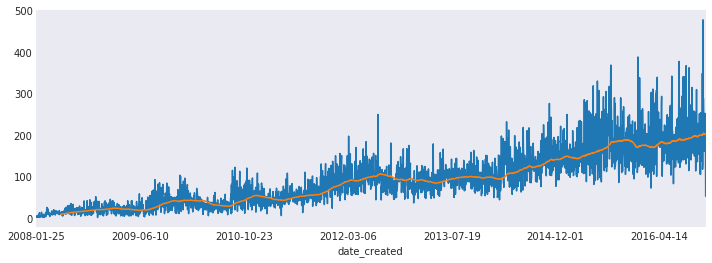

In [11]:
import seaborn as sns
%matplotlib inline
sns.set_style("dark")

data.groupby('date_created')['up_votes'].mean().plot()
data.groupby('date_created')['up_votes'].mean().rolling(window=120).mean().plot(figsize= (12, 4))

Let us check how many stories were deemed to be over 18

In [12]:
data.over_18.value_counts()

False    508916
True        320
Name: over_18, dtype: int64

320, let's explore the top 10 from over 18 stories

In [14]:
nsfwstory= data[data['over_18']== True]
[story for story in nsfwstory.sort_values('up_votes', ascending=False)['title'][:10]]

['Judge presiding over  El Chapo s  case shot, killed while jogging outside home',
 '[NSFL] Australian child molester Peter Scully faces death penalty in Philippines - Scully  filmed his torture and rape of young girls as he made them dig their own graves  and  laughed, joked and acted nonchalant about his alleged crimes ',
 'Armed suspect shot dead after trying to storm Paris police station',
 'Syria Army killed over 200 ISIS militants in 3-day long offensive in Deir Ezzor',
 'Man escapes ISIS execution',
 'ISIS massacre 14 Real Madrid fans at supporters club in Baghdad',
 'The fight is on to stop an annual Chinese event which is expected to involve the slaughter of more than 10,000 dogs, some of whom are burned or boiled alive.',
 'China: “Violent Government Thugs” Beaten To Death By Angry Crowds After They Killed A Man Documenting Their Brutality',
 'ISIS commits largest massacre since Syrian conflict by dumping 280 dead in the river and taking 400 hostages',
 'Video of riot police 

But who is posting to r/worldnews?

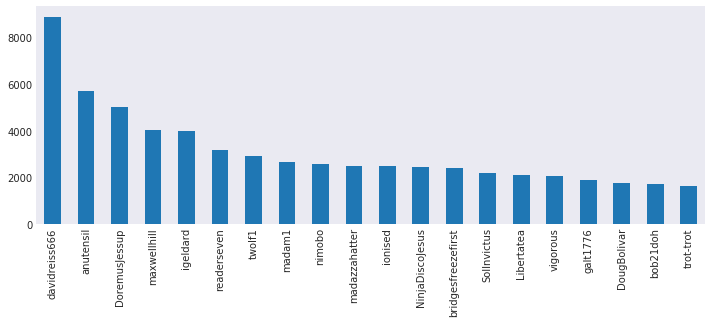

In [15]:
attf= data.author.value_counts()[:20]
attf.plot.bar(figsize= (12, 4))

It looks like davidreiss666 is the top poster. Let us check the top 10 posts

In [16]:
taff= data[data['author'] == "davidreiss666"]
#taff.sort_values('up_votes', ascending= False)['title'].value_counts()
[story for story in taff.sort_values('up_votes', ascending=False)['title'][:10]]
#htaff= taff[taff['up_votes'] > 5]

['The president of Indonesia, the world’s most populous Muslim-majority country, deemed the actions of the Islamic State in Iraq and Syria group “embarrassing” to the religion and called upon Muslim leaders to unite in tackling extremism',
 'Study: Brazilian cops killed more than 11,000 people in 5 years',
 'Chile rejects Patagonia wilderness dam project: The Chilean government has rejected a plan to build five hydroelectric dams on rivers in the south of the country. Its decision follows years of campaigning by environmentalists and local communities.',
 'A 28-year-old Tunisian who was caught on security camera stealing from a man who had fallen onto the tracks on the Stockholm subway and then leaving him to be hit by a train was sentenced to prison, deportation',
 'Armed men dressed in camouflage clothing have seized a police station in eastern Ukraine, officials say.',
 'Slavery Still Exists:  Photographs of human trafficking and enslavement around the world',
 'Commerzbank stops sp

Let us find out how many times Obama, Hillary and Trump were mentioned from 2008 - 2016

In [35]:
cand= ['Obama', 'Hillary', 'Trump']
for sole in cand:
   print( data.title.str.contains(sole).value_counts(),sole )



False    502932
True       6304
Name: title, dtype: int64 Obama
False    509016
True        220
Name: title, dtype: int64 Hillary
False    508745
True        491
Name: title, dtype: int64 Trump


In [36]:
#data.title.str.contains('Trump').value_counts()

In [37]:
from nltk import word_tokenize
tokens = data.title.map(word_tokenize)

def tell_me_about(x):
    x_l = x.lower()
    x_t = x.title()
    return data.loc[tokens.map(lambda sent: x_l in sent or x_t in sent).values]

Have a glimpse of articles about Obama, Trump and Hilary

In [38]:
tell_me_about("Obama")['title'].values.tolist()[:10]

[' Barack Hussein Obama, Omar Bradley, Benjamin Franklin and other Semitically Named American Heroes - Thoughts on the Middle East, History, and Religion',
 'Obama Campaign Skewers Clinton E-mail Statement',
 ' Europeans Would Probably Get along Best with Obama ',
 'Remarks of Senator Barack Obama:  A More Perfect Union  (Direct Link)',
 'Analysis of Obama s Speech',
 'Clinton, Obama fight for key votes VIDEO',
 'Obama inspires racial dialogue in churches',
 'Muqtada al-Sadr: Iraq s Obama?   If his authority holds, he could be on his way to metamorphosing from a militant firebrand into a sober statesman capable of bridging Iraq s divisions. ',
 'Is Obama an out of touch elitist?',
 'Will Obama be our second anti-American president?']

In [39]:
tell_me_about("Hilary")['title'].values.tolist()[:10]

['When a man LOVES a woman like Hilary',
 'Hilary Clinton says North Korea has no friends, they call her a  primary schoolgirl.  Meanwhile, they both have nuclear weapons.',
 'Hilary Clinton involves America in the Falklands dispute; backs Argentinean calls for talks over control of the Islands despite the wishes of the inhabitants to remain British',
 'Hilary Clinton re: EGYPT -  Democracy, human rights and economic reform are in the best interests of the Egyptian people. ',
 'Hilary Clinton says she supports Iranian protestors: ',
 'Hilary Clinton chides Israels settlements as illegitimate while in the same breath, the US vetoes a UN resolution on condemning those same settlements as illegal. 14 to 1 against',
 'Gaddafi s letter to Obama rebuffed by Hilary Clinton',
 'SCAF  restraint  proves hollow as more Egypt protesters killed. Last night saw an escalation of violence by security forces using automatic weapons.\r\nUS Secretary of State Hilary Clinton described recent events as “sh

In [40]:
tell_me_about("Donald")['title'].values.tolist()[:10]

['Donald Rumsfeld owns stock in the one company that owns Tamiflu one of the two effective antidotes against Swine Flu',
 'Donald Sutherland look-a-like French genius found after three years',
 'Green MP Caroline Lucas has joined the campaign to force US tycoon Donald Trump to change his plans to build a luxury golf course on the Aberdeenshire coast.',
 'Scottish Explorer Donald Mackenzie Goes Missing on Quest to Find Noah s Ark',
 'Donald Trump may run for US presidency in 2012',
 'WikiLeaks: US Government Fights Brazil s on AID/HIV patents claimed by Donald Rumsfeld s company Gilead Sciences',
 'Vietnam s Mammoth Cavern - Photo Gallery - A massive cave complex has been discovered in Vietnam and the pictures are incredible. This is the cave that Donald Trump would claim. It has a jungle. You can build a skyscraper in part of it. Waterfalls? Got those too. ',
 'Polish PM accuses European leaders of hypocrisy:  New EU president Donald Tusk makes passionate defence of EU while warning ag

In [41]:
tell_me_about("Trump")['title'].values.tolist()[:10]

['N. Korea Angered By US Non-Commitment of Promise, Flashes Its Plutonium Capability Trump Card.',
 'Trump to Miss California:  You re not fired! ',
 'Wedding Photo | Ivanka Trump',
 'Tripping up Trump. Scottish golf course project faces mass protest ',
 'The Muslim Student Union should be suspended for disrupting a speech at UC Irvine by the Israeli ambassador. Its members need to learn that their freedom of speech does not trump that of other people.',
 'Green MP Caroline Lucas has joined the campaign to force US tycoon Donald Trump to change his plans to build a luxury golf course on the Aberdeenshire coast.',
 'Donald Trump may run for US presidency in 2012',
 'Does Julian Assange Have A Trump Card Over The US Government?  Given Wikileaks two massive releases of sensitive data, the only rationale for his continued freedom is the power of the data he hasn t released ',
 'Vietnam s Mammoth Cavern - Photo Gallery - A massive cave complex has been discovered in Vietnam and the pictures

And for fun let's look at some headlines related to Apple Inc

In [42]:
tell_me_about("Apple")['title'].values.tolist()[:10]

['Apple “i” - Jobs’ style',
 'vintage big apple',
 'Man Arrested, Put In DNA Database For Allegedly Dropping Apple Core',
 'Apple Executive Board Makes Room for Two More',
 'Apple to Rogers on IPhone: you re on your own',
 'World s poorest Apple fanboys need your help. ',
 'Apple iPodagogy reaches Australia',
 'Psystar Lawyers: Apple forgot to copyright OS X',
 'The Odd Couple ATT and Apple',
 'Steve Jobs taking a leave of absence from Apple']